#Project: Predicting California Housing Prices using Multivariable Regression (Sklearn)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
np.set_printoptions(precision=2)

#Step 1: Loading Dataset

In [76]:
data = fetch_california_housing()

x_train = data.data
x_features = data.feature_names
y_train = data.target
print(f'Features of Housing Prices: {x_features}')

Features of Housing Prices: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#Step 2: Normalizing the training data

In [70]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)

#Step 3: Creating and fitting the regression model (Stochastic Gradient Descent)

In [115]:
#Learning curve is set to 0.0001
sgdr = SGDRegressor(max_iter=1000,random_state =50 , alpha=0.0001)
sgdr.fit(x_norm, y_train)

#vector w optimized weights
w_norm = sgdr.coef_
print(w_norm)

#bias term optimized
b_norm = sgdr.intercept_
print(b_norm)

[ 7.65e-01  6.51e-03 -3.08e-01  3.85e-01 -2.34e-02 -9.55e+00 -1.36e+00
 -1.22e+00]
[1.98]


#Step 4: Testing Predictions vs. Target Values

In [116]:
yhat = sgdr.predict(x_norm)
print(f'Prediction on training set: {yhat[:4]}')
print(f'Target values: {y_train[:4]}')


Prediction on training set: [4.21 4.62 3.46 3.36]
Target values: [4.53 3.58 3.52 3.41]


#Step 5: Plotting for Review

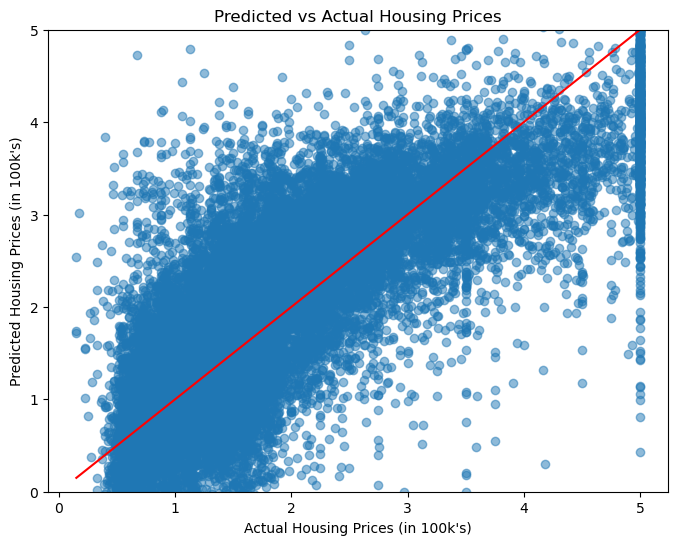

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, yhat, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r-')  # line y=x for perfect prediction
plt.xlabel("Actual Housing Prices (in 100k's)")
plt.ylim(0, 5)
plt.ylabel("Predicted Housing Prices (in 100k's)")
plt.title("Predicted vs Actual Housing Prices")
plt.show()

#Conclusion

This project used SGDRegressor from sklearn to predict California housing prices based on multiple features. The data was normalized using standard scaling, and the model was able to capture general pricing trends.

However, its performance was notably limited due to the linearity assumption of the model. Housing prices are often influenced by complex, non-linear factors, and the model struggled with certain features, leading to significant prediction errors. For example, a $109,000 difference between predicted and actual value in one case.

Future Considerations:
    -Introducing polynomial features to capture non-linear relationships, especially for latitude/longitude and average occupancy
    -Trying alternative regression models for better accuracy
    -Utulizing feature engineering 